In [133]:
# dependencies
import numpy as np;
import matplotlib.pyplot as plt;
%run Plotting.ipynb

In [134]:
#some data with 3 columns: index,eruptions,waiting
file_data = np.genfromtxt("dataLab3.txt",dtype='float',delimiter=' ',usecols=(0,1,2))
#ignore the index
data = file_data[:,[1,2]]
col_headers = np.array(["eruptions","waiting"])

scatter_unlabelled(data[:,0],data[:,1],col_headers[0],col_headers[1],1.5,5.5,40,100,'o',"blue","none","b")


AttributeError: 'numpy.ndarray' object has no attribute 'spines'

In [135]:
# computes the 1 x M vector of square distances for M x N and 1 x N data U,v respectively.
def sq_dist(U,v):
    # element wise difference, produces (M,N) shape array
    x = (U-v)
    return np.sum((x**2),axis=1)[None,:] # sum over the rows, and keep the outside dimension
sq_dist(np.array([[1,2],
                  [1,3]]),np.array([[1,2]]))

array([[0, 1]])

In [141]:
# Given M x N dimensional data find K centers 
def KMeansclustering(K,data,initialCentres,maxiter=100):
    #the shape of our data
    (M,N) = data.shape
    
    #the array with distances between each data point to each center
    #we have M vectors of N values and K centers
    centers_dist = np.zeros((K,M))
    
    # 1 x K array of centers
    centers = initialCentres
    
    col_headers = np.array([["eruptions"],["waiting"]])
    fig, ax = plt.subplots()
    scat = scatter_unlabelled(fig,ax,data[:,0],data[:,1],col_headers[0],col_headers[1],1.5,5.5,40,100,'o',"blue","none","b")
    fig.canvas.draw()
    
    for i in range(maxiter):
        # 0. displaay

        
        # 1. calculate distances to each center
        for c in range(K):
            centers_dist[c] = sq_dist(data,centers[0,c])
        
        # 2. assign each data point to closest cluster
        
        # the index of the minimum of each column is the cluster assigned
        # to the data point in that column
        idxs = np.argmin(centers_dist, axis = 0)
        
        for c in range(K):
            points_for_c = data[np.where(idxs == c)]    
            (x,y) = points_for_c.shape
            if( y ==  0):
                print("k-means: cluster " + str(c) + "is empty")
            else:
                # re-calculate the centers as mean of all assigned points
                centers[c] = (np.mean(points_for_c, axis = 0))
                
        #print("["+str(i)+"]"" Iteration: ")
        #print(centers)
        
        for p in range(K):
            addPoint(scat,centers[p],'r')
    return centers
        

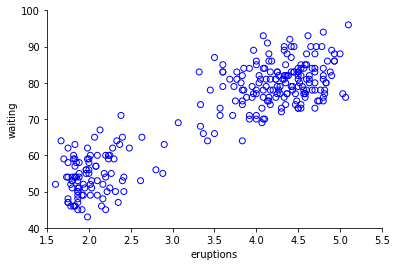

In [144]:
K = 2
centers = np.array([[2,90],[5,50]])
maxiter = 100

# KMeansclustering(2,data,centers,maxiter)

fig, ax = plt.subplots()
scat = scatter_unlabelled(fig,ax,data[:,0],data[:,1],col_headers[0],col_headers[1],1.5,5.5,40,100,'o',"blue","none","b")
fig.canvas.draw()

addPoint(scat,[3,80],'r')